##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [1]:
!pip install -q -U google-generativeai

## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [4]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# 检查可用的模型
models = genai.list_models()
for model in models:
    print(model.name, model.supported_generation_methods)

models/chat-bison-001 ['generateMessage', 'countMessageTokens']
models/text-bison-001 ['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001 ['embedText', 'countTextTokens']
models/gemini-1.0-pro-latest ['generateContent', 'countTokens']
models/gemini-1.0-pro ['generateContent', 'countTokens']
models/gemini-pro ['generateContent', 'countTokens']
models/gemini-1.0-pro-001 ['generateContent', 'countTokens', 'createTunedModel']
models/gemini-1.0-pro-vision-latest ['generateContent', 'countTokens']
models/gemini-pro-vision ['generateContent', 'countTokens']
models/gemini-1.5-pro-latest ['generateContent', 'countTokens']
models/gemini-1.5-pro-001 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro-002 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0801 ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0827 ['generateContent', 'c

## Connect to Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fine Tune Model

In [4]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# 检查所有finetune的模型
for model_info in genai.list_tuned_models():
    print(model_info.name)

tunedModels/generate-num-5917
tunedModels/amazonreview-4325
tunedModels/amazonreview-6366
tunedModels/amazonreview-2086
tunedModels/reviewclassifier-g8uk4no67udl
tunedModels/reviewclassifieroptimized-7sqarfnwtg1d
tunedModels/reviewclassifieroptimized-a5zuez0wy92v
tunedModels/reviewclassifieroptimized-w57fciqdwwqw
tunedModels/reviewclassifieroptimized-oo9z4ioizwg3


### Filter Invalid Training Data & Convert Format to the Input Format Gemini API Finetuning Accepts

In [22]:
import time
import json
import google.generativeai as genai
from google.colab import userdata
import os
import google.generativeai as genai


# 逐行读取JSON
data = []
with open('/content/drive/MyDrive/CS6220/combined_dataset.json', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            item = json.loads(line.strip())
            data.append(item)
        except json.JSONDecodeError:
            continue

# 过滤无效的训练样本并转换格式
training_data = []
for example in data:
    try:
        if isinstance(example, dict) and 'reviewText' in example and 'class' in example:
            if isinstance(example['reviewText'], str) and isinstance(example['class'], (int, float)):
                training_data.append({
                    'text_input': example['reviewText'],
                    'output': str(int(example['class']))  # 转换为字符串格式
                })
    except:
        continue

print(f"Valid examples: {len(training_data)} out of {len(data)}")


Valid examples: 6000 out of 7000


### Filter Invalid Validation Data & Convert Format to the Input Format Gemini API Finetuning Accepts

In [20]:
import json
# 逐行读取JSON
data = []
with open('/content/drive/MyDrive/CS6220/validation_dataset.json', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            item = json.loads(line.strip())
            data.append(item)
        except json.JSONDecodeError:
            continue

# 过滤无效的训练样本并转换格式
validation_data = []
for example in data:
    try:
        if isinstance(example, dict) and 'reviewText' in example and 'class' in example:
            if isinstance(example['reviewText'], str) and isinstance(example['class'], (int, float)):
                validation_data.append({
                    'text_input': example['reviewText'],
                    'output': str(int(example['class']))  # 转换为字符串格式
                })
    except:
        continue

validation_text_input = [item['text_input'] for item in validation_data]
validation_labels = [int(item['output']) for item in validation_data]

print(f"Valid examples: {len(validation_data)} out of {len(data)}")


Valid examples: 300 out of 350


In [ ]:
import optuna
from sklearn.metrics import log_loss  # 用于分类任务
import seaborn as sns
import pandas as pd


def compute_validation_loss(model, validation_text_input, validation_labels):
    """
    计算模型在验证集上的损失。

    参数:
    - model: 已微调的模型
    - validation_text_input: 验证集的输入文本列表
    - validation_labels: 验证集的真实标签列表

    返回:
    - 验证集损失 (float)
    """
    # 生成预测概率或输出值
    predictions = []
    for text in validation_text_input:
        prediction = model.generate_content(text,
          safety_settings=[
        {
            "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_HATE_SPEECH",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
            "threshold": "BLOCK_NONE",
        }
    ])
        predictions.append(prediction)

    # 计算验证损失，例如 log_loss
    val_loss = log_loss(validation_labels, predictions)
    return val_loss


def objective(trial):
    # 让 Optuna 优化以下超参数
    epoch_count = trial.suggest_int("epoch_count", 1, 10)
    batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)

    # 设置并运行微调过程
    operation = genai.create_tuned_model(
        display_name="review-classifier-optimized",
        source_model="models/gemini-1.5-flash-001-tuning",
        epoch_count=epoch_count,
        batch_size=batch_size,
        learning_rate=learning_rate,
        training_data=training_data,
    )


    # 等待微调完成并计算验证集性能作为目标值
    result = operation.result()

    # 提取并绘制 Loss / Epoch 图
    snapshots = pd.DataFrame(result.tuning_task.snapshots)
    sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

    val_loss = compute_validation_loss(result, validation_text_input, validation_labels)
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("Best Parameters:", study.best_params)

In [5]:

# 开始训练
base_model = "models/gemini-1.5-flash-001-tuning"
operation = genai.create_tuned_model(
    display_name="review-classifier",
    source_model=base_model,
    epoch_count=2,
    batch_size=4,
    learning_rate=0.001,
    training_data=training_data,
)

# 等待训练完成
for status in operation.wait_bar():
    time.sleep(10)

result = operation.result()
print("Model Name:", result)

reviewclassifier1 = result.name

# 使用训练好的模型
model = genai.GenerativeModel(model_name=result.name)
test_review = "The case fits perfectly and provides good protection"
result = model.generate_content(test_review)
print(result.text)

  0%|          | 0/3000 [00:00<?, ?it/s]

TunedModel(name='tunedModels/reviewclassifier-g8uk4no67udl',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='review-classifier',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 11, 12, 0, 45, 42, 653376, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 11, 12, 2, 51, 35, 127299, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 11, 12, 0, 45, 43, 430072, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 11, 12, 2, 51, 35, 127299, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=2,
                                      

In [7]:
result = operation.result()
reviewclassifier1 = result.name
print("Tuned Model Name:", result.name)

NameError: name 'operation' is not defined

In [ ]:
# Use metadata to check the state
operation.metadata

In [ ]:
# Epoch/Loss Graph
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [6]:
# 使用训练好的模型
model = genai.GenerativeModel(model_name='tunedModels/reviewclassifier-g8uk4no67udl')
test_review = "The case fits perfectly and provides good protection"
prediction = model.generate_content(test_review)
print(prediction.text)

1


## Metrics

In [6]:
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

test_data_path = "/content/drive/MyDrive/CS6220/test_dataset.csv"
test_data = pd.read_csv(test_data_path)

test_data = test_data.dropna(subset=['reviewText', 'class'])
test_data = test_data.iloc[:1000]

# 提取测试文本
test_texts = test_data['reviewText']

# 存储预测结果
test_predictions = []

# 使用模型逐条预测
model = genai.GenerativeModel(model_name='tunedModels/reviewclassifier-g8uk4no67udl')

for text in tqdm(test_texts):
  try:
    prediction = model.generate_content(
    text,
    safety_settings=[
        {
            "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_HATE_SPEECH",
            "threshold": "BLOCK_NONE",
        },
        {
            "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
            "threshold": "BLOCK_NONE",
        }
    ]
)
    # print(prediction.text)
    # 将预测结果存入列表
    test_predictions.append(prediction.text)
  except ValueError as e:
        print(f"跳过一个输入，原因: {e}")
        # test_predictions.append('0')

# 现在 test_predictions 包含了所有测试样本的预测标签
# 继续进行性能评估
test_predictions = [int(x) for x in test_predictions]
test_labels = test_data['class'].astype(int)  # 确保标签格式正确

# 计算性能指标
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)

# 打印性能指标
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


100%|██████████| 1000/1000 [21:00<00:00,  1.26s/it]

Accuracy: 0.8960
Precision: 0.9621
Recall: 0.9033


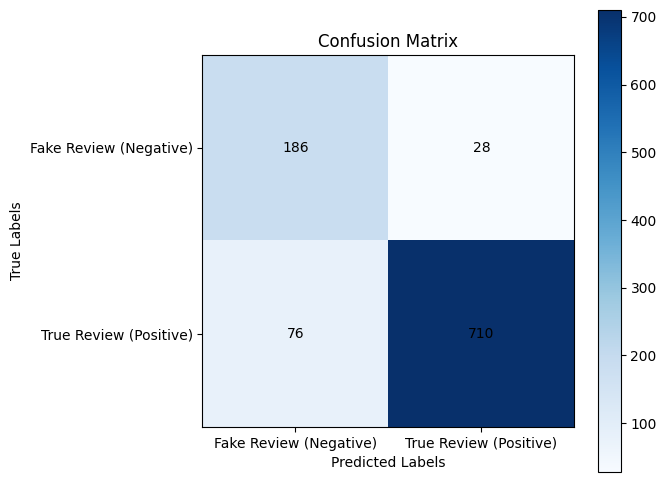

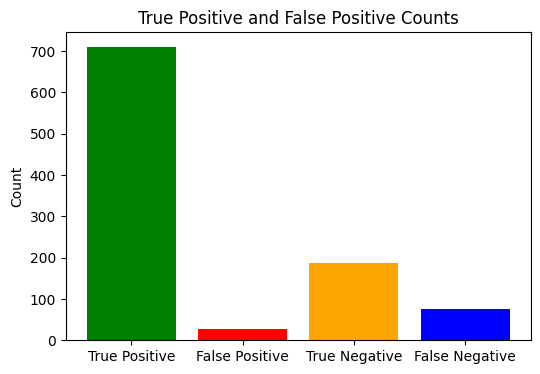

In [8]:
# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Fake Review (Negative)", "True Review (Positive)"])
plt.yticks([0, 1], ["Fake Review (Negative)", "True Review (Positive)"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# 在混淆矩阵图中添加每个格子的数字
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="black")

plt.show()

# 提取并绘制 True Positive 和 False Positive 的柱状图
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

plt.figure(figsize=(6, 4))
plt.bar(['True Positive', 'False Positive', 'True Negative', 'False Negative'], [TP, FP, TN, FN], color=['green', 'red', 'orange', 'blue'])
plt.ylabel("Count")
plt.title("True Positive and False Positive Counts")
plt.show()
